Pendulum movement data

In [123]:
# Importing the libraries
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# Reading the data
df = pd.read_csv('movement_data.csv')
df.head()

,position,time,speed,acceleration
0,"(1392, 685)",0.000,40.027,1200.795
1,"(1395, 683)",0.033,0.093,-1198.005
2,"(1394, 684)",0.067,0.036,-1.696
3,"(1380, 686)",0.100,0.365,9.851
4,"(1362, 690)",0.133,0.476,3.326


In [125]:
#replace first 2 speed values to nan and first 2 acceleration values to nan
df['speed'] = df['speed'].replace(df['speed'][0], np.nan)
df['speed'] = df['speed'].replace(df['speed'][1], np.nan)
df['acceleration'] = df['acceleration'].replace(df['acceleration'][0], np.nan)
df['acceleration'] = df['acceleration'].replace(df['acceleration'][1], np.nan)
df['acceleration'] = df['acceleration'].replace(df['acceleration'][2], np.nan)
df['acceleration'] = df['acceleration'].replace(df['acceleration'][3], np.nan)
df.head()


,position,time,speed,acceleration
0,"(1392, 685)",0.000,NaN,NaN
1,"(1395, 683)",0.033,NaN,NaN
2,"(1394, 684)",0.067,0.036,NaN
3,"(1380, 686)",0.100,0.365,NaN
4,"(1362, 690)",0.133,0.476,3.326


In [126]:
# Checking the shape of the data
df.shape

(471, 4)

In [127]:
# Checking the distribution of the data
df.describe()

,time,speed,acceleration
count,471.000000,466.000000,467.000000
mean,7.833333,0.768530,0.039634
std,4.537009,0.376015,3.175544
min,0.000000,0.000000,-7.730000
25%,3.916500,0.457000,-2.440000
50%,7.833000,0.836000,0.000000
75%,11.750000,1.063000,2.542000
max,15.667000,1.447000,6.986000


Text(0, 0.5, 'Acceleration')

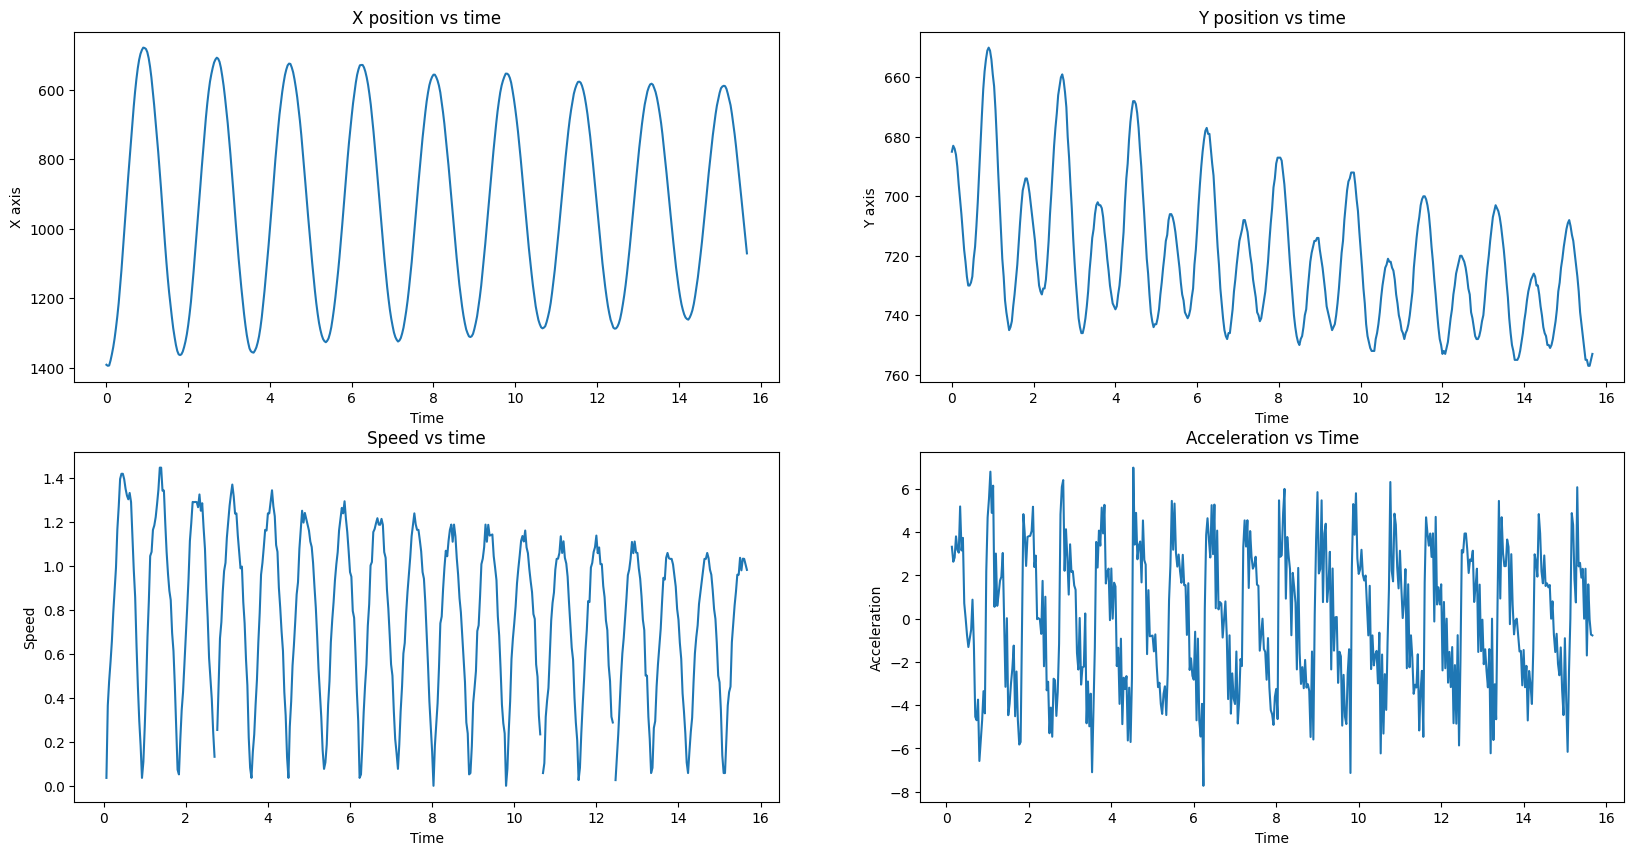

In [128]:

points = df['position'].apply(literal_eval)
points = np.array(points.tolist())
x = points[:, 0]
y = points[:, 1]

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(df['time'], x)
plt.title('X position vs time')
plt.xlabel('Time')
plt.ylabel('X axis')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)
plt.plot(df['time'], y)
plt.title('Y position vs time')
plt.xlabel('Time')
plt.ylabel('Y axis')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 3)
plt.plot(df['time'], df['speed'])
plt.title('Speed vs time')
plt.xlabel('Time')
plt.ylabel('Speed')

plt.subplot(2, 2, 4)
plt.plot(df['time'], df['acceleration'])
plt.title('Acceleration vs Time')
plt.xlabel('Time')
plt.ylabel('Acceleration')

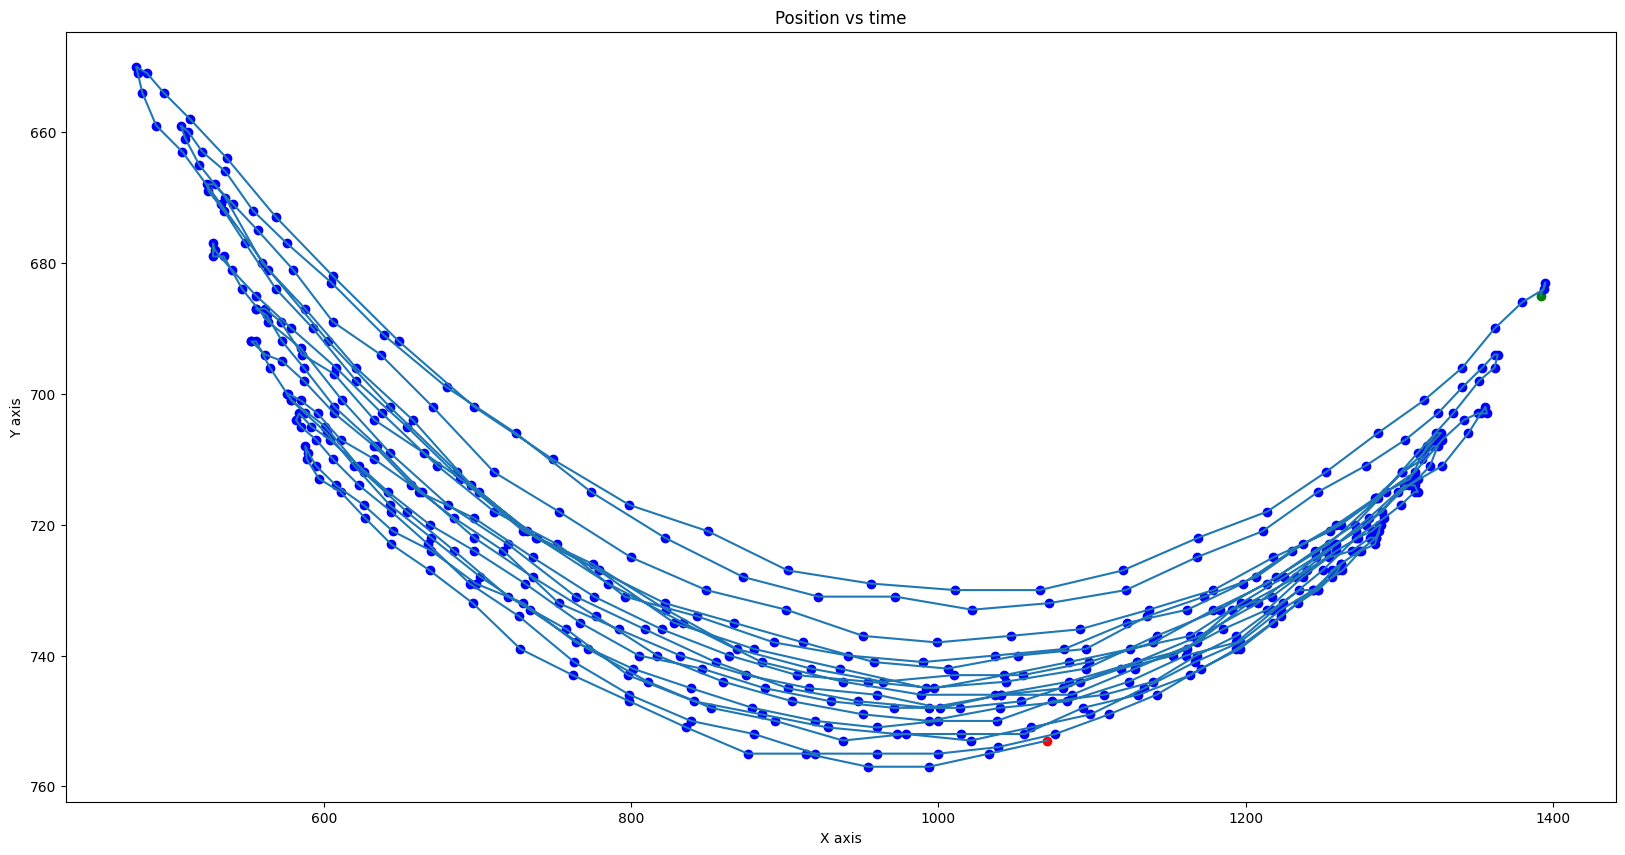

In [129]:
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Position vs time')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.gca().invert_yaxis()
plt.scatter(x[-1], y[-1], color='red')
plt.scatter(x[0], y[0], color='green')
plt.scatter(x[1:-1], y[1:-1], color='blue')

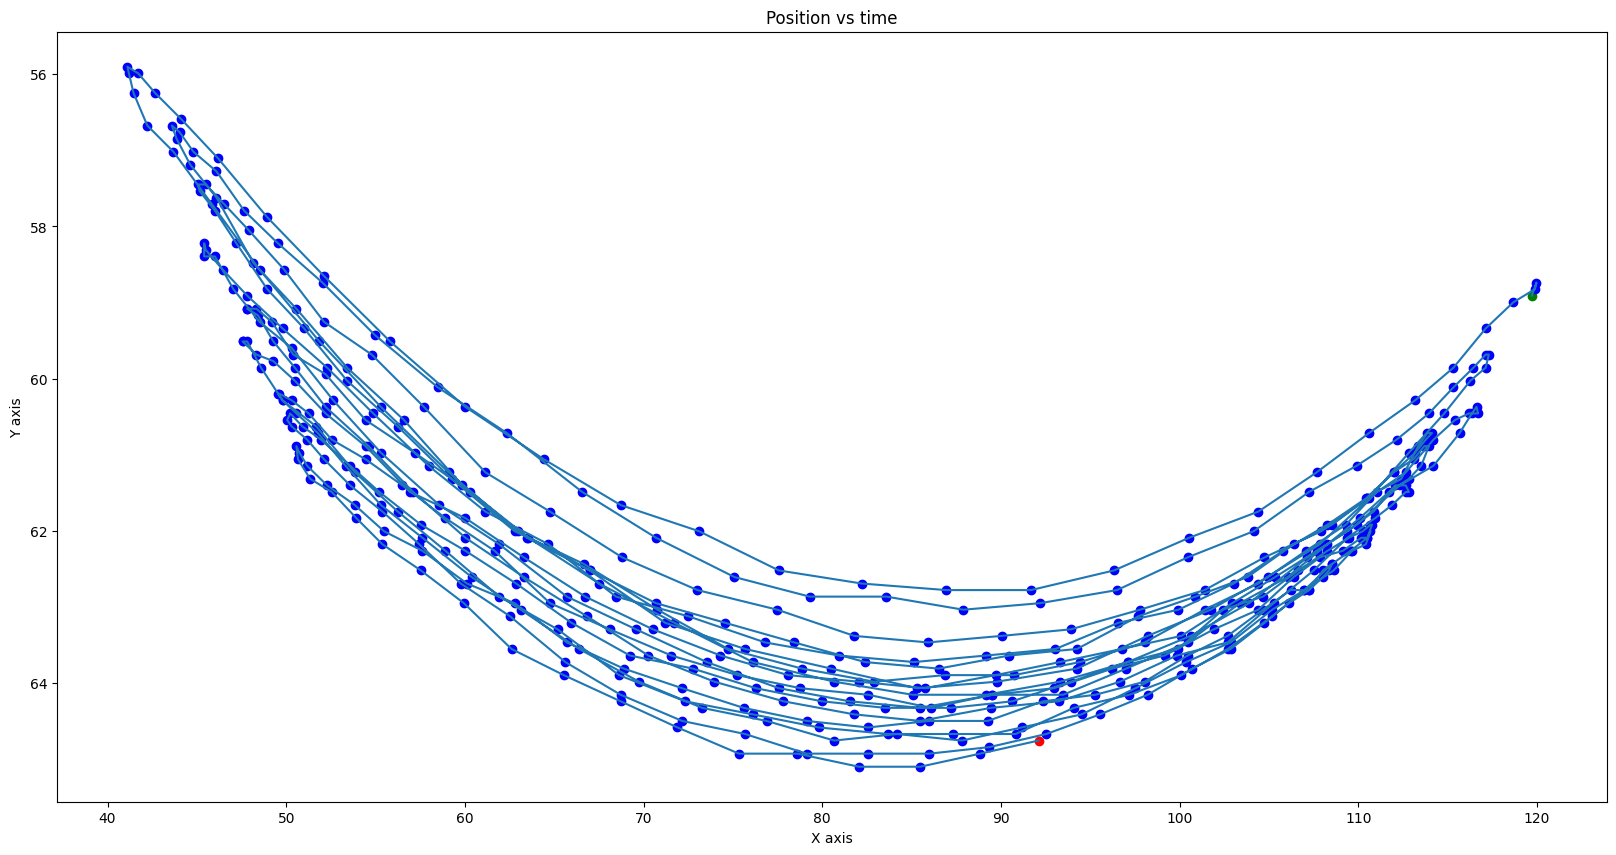

In [130]:
# Plotting the position vs time in cm each pixel is 0.086 cm
plt.figure(figsize=(20, 10))
plt.plot(x * 0.086, y * 0.086)
plt.title('Position vs time')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.gca().invert_yaxis()
plt.scatter(x[-1] * 0.086, y[-1] * 0.086, color='red')
plt.scatter(x[0] * 0.086, y[0] * 0.086, color='green')
plt.scatter(x[1:-1] * 0.086, y[1:-1] * 0.086, color='blue')


Amplitude=33.54721674604294, Angular freq.=3.5456772459796513, phase=1.4189426536103922, offset=80.43377438201419, Max. Cov.=0.022687295019668652


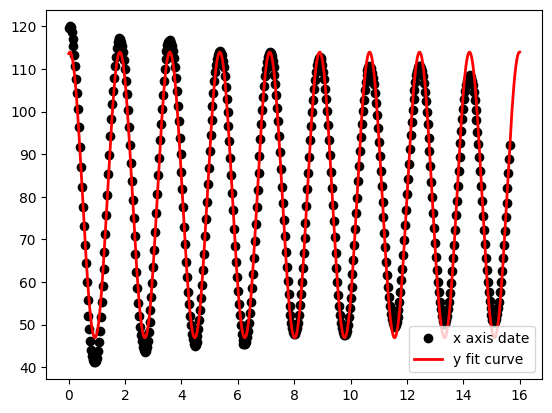

Amplitude=-2.1028063939808637, Angular freq.=7.090507684137412, phase=1.2978454421117231, offset=61.9383992162333, Max. Cov.=0.007369328267422274


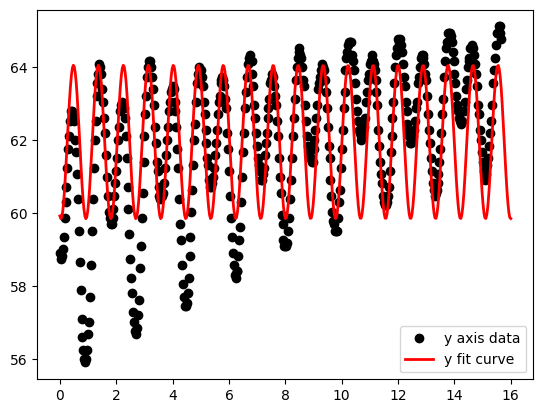

In [143]:
import numpy, scipy.optimize
# https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1] - tt[0]))  # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:]) + 1])  # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2. ** 0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2. * numpy.pi * guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w * t + p) + c

    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w / (2. * numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w * t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1. / f, "fitfunc": fitfunc,
            "maxcov": numpy.max(pcov), "rawres": (guess, popt, pcov)}


import pylab as plt

tt = df['time']
yynoise = x*0.086
tt2 = numpy.linspace(0, 16, 471)

res = fit_sin(tt, yynoise)
print("Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res)

#plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="x axis date")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

tt = df['time']
yynoise = y*0.086
tt2 = numpy.linspace(0, 16, 471)

res = fit_sin(tt, yynoise)
print("Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res)

#plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y axis data")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

In [142]:
from numpy import arcsin
import math

# Set up variables
length = 54 / 100  # convert cm to m
amplitude = 40 / 100  # convert cm to m
g = 9.81  # acceleration due to gravity in m/s^2
Θ = arcsin(amplitude/length)

# Calculate the highest acceleration
highest_acceleration = -g * math.sin(Θ)

# Calculate the period
period = 2 * math.pi * math.sqrt(length / g)

# Calculate the highest speed
highest_speed = amplitude * math.sqrt(g / length)

# Print the results
print("Highest speed: {:.3f} m/s".format(highest_speed))
print("Acceleration at highest point: {:.3f} m/s^2".format(highest_acceleration))
print("Period: {:.3f} s".format(period))


Highest speed: 1.705 m/s
Acceleration at highest point: -7.267 m/s^2
Period: 1.474 s
